# Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables.

## 1. relplot()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

### Relating variables with scatter plots

The most basic, which should be used when both variables are numeric, is the scatterplot() function.
The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter")

In [4]:
dataset = sns.load_dataset("tips")

In [5]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


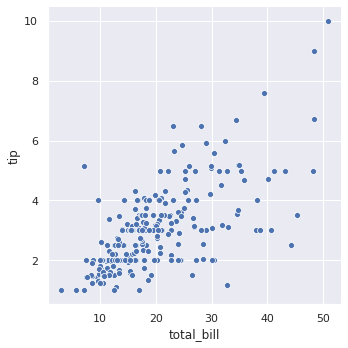

In [10]:
sns.relplot(x="total_bill", y="tip", data=dataset)

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”

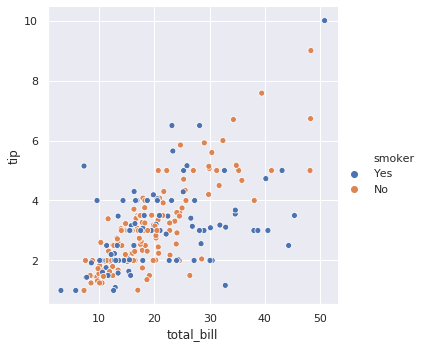

In [13]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=dataset)

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

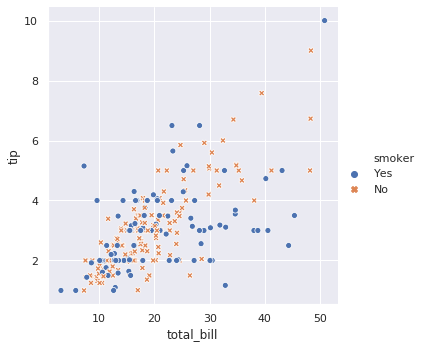

In [16]:
sns.relplot(x="total_bill", y="tip", data=dataset, hue='smoker', style='smoker')

The third kind of semantic variable changes the size of each point:

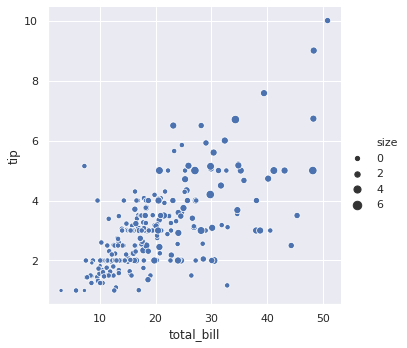

In [24]:
sns.relplot(x="total_bill", y="tip", size="size", data=dataset)

## Emphasizing continuity with line plots

The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

In [28]:
fmri = sns.load_dataset("fmri")
fmri.head()


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


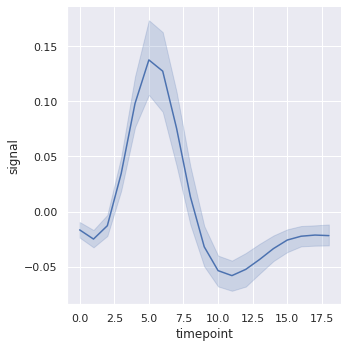

In [29]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

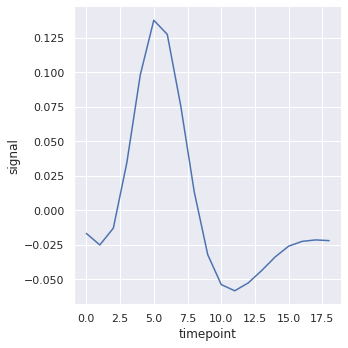

In [30]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, ci=None)

To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

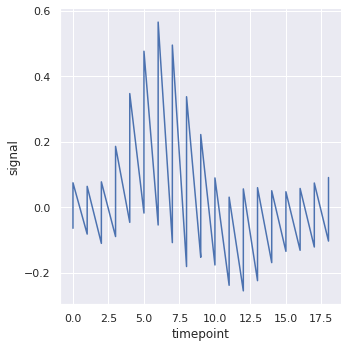

In [31]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

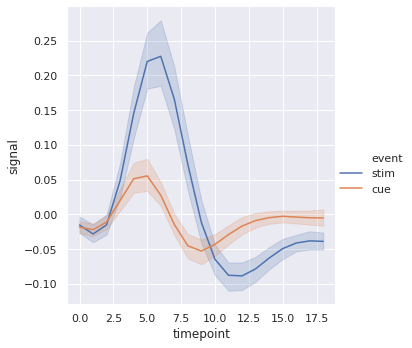

In [34]:
sns.relplot(x="timepoint", y="signal", kind='line', data=fmri, hue="event")

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

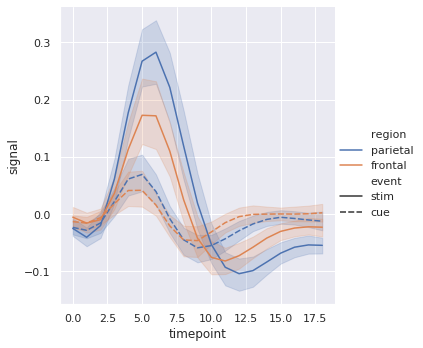

In [36]:
sns.relplot(x="timepoint", y="signal", kind='line', data=fmri, hue="region", style="event")

## Showing multiple relationships with facets

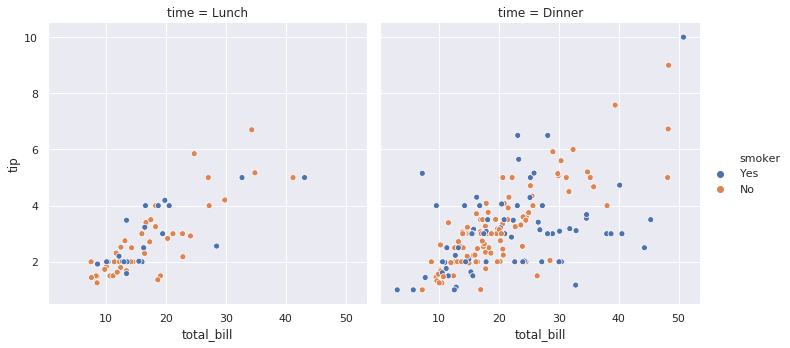

In [41]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=dataset)

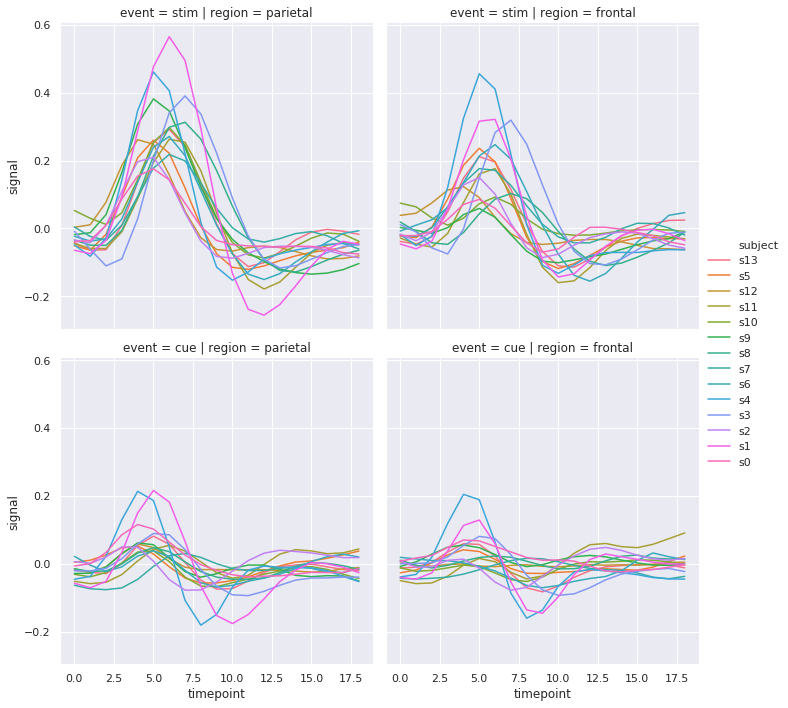

In [47]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=5,
            kind="line", estimator=None, data=fmri);